In [5]:
import tensorflow as tf
print(tf.__version__)

2.2.0


난수 생성
-랜덤은 신경망에서 꼭 필요한 기능임. 신경망을 쉽게 정의해보면 많은 숫자로 구성된 행렬이라 할 수 있음. 이 행렬에 어떤 입력을 넣으면 출력을 얻게 되고, 잘 작동할 경우 원하는 출력에 점점 가까워지게 됨.

-여기서 행렬을 구성하는 숫자들은 초기엔 랜덤한 값으로 지정할 수 밖에 없다. 처음에 신경망의 초기값을 지정해주는 것을 initialization이라 하며, xavier initialization과 He initialization이 가장 많이 쓰인다. 

In [6]:
#uniform함수를 불러오면 균일분포(uniform distribution)의 난수를 얻을 수 있다
#균일분포란 최솟값과 최댓값 사이의 모든 수가 나올 확률이 동일한 분포에서 수를 뽑는다는 뜻
#[1]은 결과값의 shape(행렬을 구성하는 행, 열 등 차원의 수를 나타내는 값)를 뜻함
rand = tf.random.uniform([1], 0, 1) #0과 1은 각각 최소값과 최대값을 나타낸다
#즉, 0과 1 사이에서 모든 수가 나올 확률이 동일한 분포에서 난수 하나를 뽑는 것.

#python에선 변하지 않는 값(상수)에 대해 대괄호 대신 소괄호 ()로 묶는 tuple자료형 사용
#(1,)로 원소 뒤에 쉼표를 써줘서 이 값이 튜플이라는 것을 나타냄
print(rand)

tf.Tensor([0.19385564], shape=(1,), dtype=float32)


In [7]:
print(tf.random.uniform([4], 0, 1)) #0과 1사이의 4개의 랜덤한 값을 생성

tf.Tensor([0.9854274  0.35982096 0.9565778  0.09762263], shape=(4,), dtype=float32)


In [8]:
#normal함수는 균일분포가 아닌 정규분포를 통해 난수를 받는다
#두번째 인자는 정규분포의 평균, 세번째 인자는 정규분포의 표준편차를 뜻함.
#평균이 0이고 표준편차가 1인 정규분포를 표준정규분포라고 한다.
print(tf.random.normal([4], 0, 1))

tf.Tensor([-0.9978365   1.0010455  -1.3555852  -0.28800645], shape=(4,), dtype=float32)


뉴런 만들기
입력->뉴런->출력
신경망은 뉴런이 여러 개 모여 layer를 구성한 후, 이 layer가 다시 모여 구성된 형태임.
뉴런은 입력, 가중치, 활성화함수, 출력으로 구성됨.
입력->가중치->활성화함수->출력
뉴런에서 학습 시 변하는 것은 가중치이다.
처음엔 초기화를 통해 랜덤값을 넣고, 학습과정에서 점차 일정한 값으로 수렴함.
학습이 잘 된다는 것은 좋은 가중치를 얻어 원하는 출력에 점점 가까운 값을 얻는 것이라 할 수 있다.
활성화 함수로는 sigmoid, ReLU가 있다. sigmoid는 S자 형태의 곡선을, reLU는 rectified linear unit의 줄임말로, 0보다 작은 값은 0으로, 0이상의 값은 그 값 그대로 출력한다.
초창기엔 sigmoid가 주로 쓰였으나 hidden layer를 다수 사용하게 되면서 ReLU가 더 많이 쓰이고 있음. 딥러닝에서 오류를 역전파(back propagation)할때 sigmoid함수가 값을 점점 작아지게 하는 문제를 해결하기위해 ReLU를 사용. 양수를 그대로 반환하기 때문에 값의 왜곡이 적어진다.


In [16]:
#sigmoid func
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x)) #1 / 1 + e^(-x), x에 시그모이드 함수를 취한 값이 된다
  #여기서 e는 상수 exponential값(약 2.7xxx)을 뜻한다
  #x값이 0보다 큰 양수이면 0.5보다 큰 값으로, 0보다 작은 음수이면 0.5보다 작은 값으로 수렴한다
  #sigmoid함수는 binary classification(AND, OR, XOR 등의 연산)에 용이하다.

In [24]:
#입력인 x에는 1을 넣고, 가중치는 w로 정규분포의 랜덤한 값을 넣는다.
#실제 출력인 output은 sigmoid()함수에 입력과 가중치 값을 곱한 값을 넣어서 계산함
x = 1
y = 0
w = tf.random.normal([1], 0, 1)
output = sigmoid(x * w)
print(output)

0.3769907455013972


실제 출력으로 나온 값과 기대출력인 y(=0)의 차이 0 - 1.39xxx를 error, 혹은 cost라고 한다.
뉴런의 학습은 이 error가 0에 가까워지게 해서 출력으로 기댓값에 가까운 값을 얻는 것임.

여기서 뉴런이란 결국 w값인데, 이 w에 변화를 주기 위해 경사하강법(gradient descent algorithm)을 사용한다. w값에 입력과 학습률(알파값)과 error를 곱한 값을 더해주는 것.

learning rate(학습률)은 w값을 업데이트하는 정도로, 너무 큰 값이면 학습이 빠르게 되나 과도한 학습으로 인해 적정한 수치를 벗어날 우려가 있고, 너무 작은 값으로 설정 시 학습속도가 너무 느려질 수 있다.

w = w + x * a(alpha) * error

In [26]:
learning_rate = 0.1
for i in range(1000):
  output = sigmoid(x * w) #sigmoid함수를 통해 y hat(추측값)을 계산한다
  error = y - output #기대출력 y에서 실제출력인 output을 빼서 error(cost)계산
  w = w + x * learning_rate * error #기존의 weight값에 x와 학습률과 error를 곱한 값을 더해준다

  if i % 100 == 0:
    print(i, error, output)
  #error와 실제출력값이 0에 가까워지는 것을 확인할 수 있음

0 -0.010126219040756548 0.010126219040756548
100 -0.009202841664408034 0.009202841664408034
200 -0.00843323315973859 0.00843323315973859
300 -0.007782012544990343 0.007782012544990343
400 -0.007223863664966162 0.007223863664966162
500 -0.006740196187976773 0.006740196187976773
600 -0.006317051975589433 0.006317051975589433
700 -0.00594377041342805 0.00594377041342805
800 -0.005612029079923202 0.005612029079923202
900 -0.005315287549731926 0.005315287549731926


In [20]:
#입력으로 0을 넣었을 때 출력으로 1을 얻는 뉴런
x = 0
y = 1
w = tf.random.normal([1], 0, 1)

for i in range(1000):
  output = sigmoid(x * w)
  error = y - output
  w = w + x * learning_rate * error

  if i % 100 == 0:
    print(i, error, output)

0 0.5 0.5
100 0.5 0.5
200 0.5 0.5
300 0.5 0.5
400 0.5 0.5
500 0.5 0.5
600 0.5 0.5
700 0.5 0.5
800 0.5 0.5
900 0.5 0.5


x가 0이므로 w에 더해지는 값이 없다.

**따라서 bias가 필요하다**

편향(bias)은 w처럼 난수로 초기화되며 뉴런에 더해져 출력을 계산하게 된다.

In [21]:
#입력으로 0을 넣었을 때 출력으로 1을 얻는 뉴런
x = 0
y = 1
w = tf.random.normal([1], 0, 1)
b = tf.random.normal([1], 0, 1)

for i in range(1000):
  output = sigmoid(x * w + 1 * b)
  error = y - output
  w = w + x * learning_rate * error
  b = b + 1 * learning_rate * error

  if i % 100 == 0:
    print(i, error, output)

0 0.3080527918645196 0.6919472081354804
100 0.08513887023858657 0.9148611297614134
200 0.047289301573517295 0.9527106984264827
300 0.03249435670608014 0.9675056432939199
400 0.024688002977401036 0.975311997022599
500 0.019882702140422315 0.9801172978595777
600 0.016632821681754284 0.9833671783182457
700 0.014290696900852162 0.9857093030991478
800 0.01252372084543485 0.9874762791545652
900 0.011143798171090014 0.98885620182891


In [30]:
#AND연산을 수행하는 뉴런
#[1, 1]인 경우 빼고 모두 거짓이다
import numpy as np
x = np.array([[1, 1],
              [1, 0],
              [0, 1],
              [0, 0]])
y = np.array([[1],
              [0],
              [0],
              [0]])

w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j] * w) + b * b_x)
    error = y[j][0] - output
    #weight update: x[j]는 j의 값이 0~3에서 변함에 따라 [1, 1], [1, 0], [0, 1], [0, 0]이 된다
    w = w + x[j] * learning_rate * error #x의 각 원소 값에 learning rate와 error를 곱한다
    b = b + b_x * learning_rate * error
    error_sum += error

  if i % 200 == 0:
    print(i, error_sum)

[1 1]
0 -1.0162389132052376
200 -0.10023165544576196
400 -0.06200587595374199
600 -0.044753459215438975
800 -0.034916314479281396
1000 -0.0285757182921623
1200 -0.024157653290471322
1400 -0.020908193859937727
1600 -0.01841946335931934
1800 -0.01645528778228454


In [31]:
for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i] * w) + b))

X: [1 1] Y: [1] Output: 0.965281550266567
X: [1 0] Y: [0] Output: 0.02460572824472155
X: [0 1] Y: [0] Output: 0.024680168047841882
X: [0 0] Y: [0] Output: 2.2959013356728506e-05


실제 출력이 기대출력에 가깝게 나오는 것을 확인할 수 있다. 

In [33]:
#OR 연산을 수행하는 뉴런
#[0, 0]인 경우 빼고 모두 참이다
x = np.array([[1, 1],
              [1, 0],
              [0, 1],
              [0, 0]])
y = np.array([[1],
              [1],
              [1],
              [0]])

w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1
print(y[3])
for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j] * w) + b * b_x)
    error = y[j][0] - output
    #weight update: x[j]는 j의 값이 0~3에서 변함에 따라 [1, 1], [1, 0], [0, 1], [0, 0]이 된다
    w = w + x[j] * learning_rate * error #x의 각 원소 값에 learning rate와 error를 곱한다
    b = b + b_x * learning_rate * error
    error_sum += error

  if i % 200 == 0:
    print(i, error_sum)

[0]
0 1.0324315360387568
200 -0.053638713149477185
400 -0.026929846436375637
600 -0.01787275919590818
800 -0.01332631188263364
1000 -0.010603581038576802
1200 -0.008795147882302248
1400 -0.007508896011149797
1600 -0.006547780603875321
1800 -0.005803328519417915


In [34]:
for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i] * w) + b))

X: [1 1] Y: [1] Output: 0.9999971034449663
X: [1 0] Y: [1] Output: 0.9896752440935632
X: [0 1] Y: [1] Output: 0.9896389793134375
X: [0 0] Y: [0] Output: 0.025834631613720415


In [35]:
#XOR 연산을 수행하는 뉴런
#서로 같으면 거짓, 다르면 참을 낸다
x = np.array([[1, 1],
              [1, 0],
              [0, 1],
              [0, 0]])
y = np.array([[0],
              [1],
              [1],
              [0]])

w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1
print(y[3])
for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j] * w) + b * b_x)
    error = y[j][0] - output
    #weight update: x[j]는 j의 값이 0~3에서 변함에 따라 [1, 1], [1, 0], [0, 1], [0, 0]이 된다
    w = w + x[j] * learning_rate * error #x의 각 원소 값에 learning rate와 error를 곱한다
    b = b + b_x * learning_rate * error
    error_sum += error

  if i % 200 == 0:
    print(i, error_sum)

[0]
0 0.16754567452444102
200 -0.0018827506513510173
400 -7.654425966741041e-05
600 -3.114155651906536e-06
800 -1.3495302531030262e-07
1000 4.653552654332316e-09
1200 3.722842145670313e-09
1400 3.722842145670313e-09
1600 3.722842145670313e-09
1800 3.722842145670313e-09


In [36]:
#evaluate
for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i] * w) + b))

X: [1 1] Y: [0] Output: 0.5128176286712095
X: [1 0] Y: [1] Output: 0.5128176305326305
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.5000000009313226


정상적으로 classify할 수 없다는것을 알 수 있다. 따라서 하나의 perceptron으로는 XOR연산자를 만들 수 없다는 것을 증명할 수 있다.

이런 문제를 해결하기 위해 한 개 이상의 뉴런을 사용하여 학습을 시키도록 한다.

In [40]:
#XOR 연산을 수행하는 뉴런
#서로 같으면 거짓, 다르면 참을 낸다
x = np.array([[1, 1],
              [1, 0],
              [0, 1],
              [0, 0]])
y = np.array([[0],
              [1],
              [1],
              [0]])

#모델에서 사용할 layer를 정의
#Dense는 가장 기본적인 layer로써, layer의 입력과 출력 사이에 있는 모든 뉴런이 서로 연결되는 layer이다.
#units는 layer를 구성하는 뉴런의 개수. 뉴런이 많을수록 일반적으로 layer의 성능은 좋아지나, 계산량 또한 많아지고
#메모리도 많이 차지하게 됨.
#activation: 활성화함수
#input_shape: Sequential모델의 첫번째 layer에서만 정의함. 입력의 차원수를 정의.
#각 데이터가 [1, 1], [1, 0]처럼 2개의 입력을 받는 1차원 배열이기 때문에 1차원의 원소의 개수인
#2를 명시하여 (2,)라고 정의함
model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape = (2,)), 
        tf.keras.layers.Dense(units = 1, activation='sigmoid')
])

#optimizer는 딥러닝의 학습식을 정의하는 부분이다.
#SGD = Stochastic Gradient Descent(확률적 경사 하강법)
#경사하강법: 가중치 업데이트 시 미분을 통해 기울기를 구한 다음 기울기가 낮은 쪽으로 업데이트
#Stochastic: 전체를 한번에 계산하지 않고 확률적으로 일부 샘플을 구해서 조금씩 나누어 계산
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

#Loss는 error와 비슷한 개념
#딥러닝은 보통 이 손실을 줄이는 방향으로 학습함.
#mse는 평균제곱오차(mean squared error)의 약자로, 기대출력에서 실제출력을 뺸 후 그 값을 제곱한 값을 평균하는 것을 의미.
#각 layer가 기본적으로 bias를 포함하고 있기 때문에 각 layer의 Param#(weight개수)가 6과 3이 나오게 된다 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


model이란 딥러닝 계산을 간편하게 하기 위한 추상적인 클래스다. 쉽게 말해 딥러닝계산을 위한 여러 함수와 변수의 묶음이다. model은 tf.keras에서 딥러닝을 계산하는 가장 핵심적인 단위이다.

가장 많이 쓰이는 구조: Sequential. 순차적으로 뉴런과 뉴런이 합쳐진 단위인 layer를 일직선으로 배치한 것.

보통 Dense layer의 파라미터 수는 (입력 측 뉴런의 수 + 1(bias)) * (출력 측 뉴런의 수)의 식으로 구할 수 있다. 여기서 입/출력 측이란 dense layer에 들어오는 입력과 dense layer의 뉴런을 뜻한다. 이 식에 따르면 위 모델의 첫번째 layer의 파라미터 수는 입력이 2개, 출력(첫번쨰 layer의 총 뉴런 수)이 2개이므로 (2+1) * (2) = 6개가 된다.
두번째 layer의 파라미터 수는 입력이 2개, 두번째 layer의 뉴런 수는 1개이므로 (2+1) * (1) = 3개가 된다.

In [41]:
#epoch: 훈련 데이터를 반복 학습시키는 횟수
#batch_size: 각 epoch에 학습시키는 훈련 데이터의 수
history = model.fit(x, y, epochs = 2000, batch_size=1)

Epoch 1/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2547
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2548
Epoch 3/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2547
Epoch 4/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2547
Epoch 5/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2546
Epoch 6/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2546
Epoch 7/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2544
Epoch 8/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2545
Epoch 9/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2544
Epoch 10/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2544
Epoch 11/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2542
Epoch 12/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2542
Epoch 13/2000
4/4 [==============================

In [42]:
model.predict(x)

array([[0.51754767],
       [0.8947025 ],
       [0.49750906],
       [0.08354779]], dtype=float32)

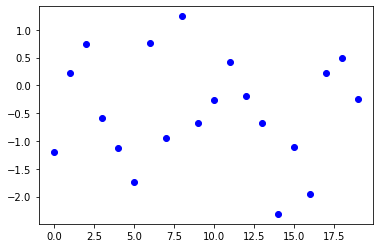

In [44]:
#시각화
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20], 0, 1)
plt.plot(x, y, 'bo') #'bo'추가 시 파란 점(blue dot 'o') 그래프 생성
plt.show()

In [ ]:
#히스토그램
random_normal = tf.random.normal([100000], 0, 1)
plt.hist(random_normal, bins = 100) #데이터를 얼마나 많은 수의 영역으로 나눌지 정의하는 것

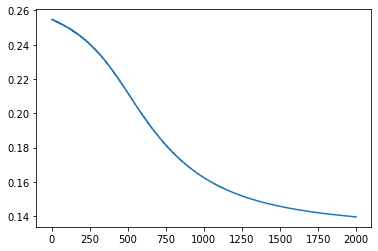

In [45]:
plt.plot(history.history['loss'])

In [46]:
!git init

Initialized empty Git repository in /content/.git/


In [47]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.config/
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)


In [48]:
!git config --global user.name "wordjun"
!git config --global user.email "wordjun@naver.com"

In [49]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.config/
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)


In [50]:
!git remote add origin https://github.com/wordjun/Future_Lab.git

In [51]:
!ls

sample_data


In [52]:
!cd sample_data

In [53]:
!ls

sample_data
